In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
dataset = pd.read_csv("energydata_complete.csv")

In [3]:
dataset.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [5]:
dataset.shape

(19735, 29)

In [6]:
dataset.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [7]:
dataset.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [8]:
dataset.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Appliances', ylabel='Density'>

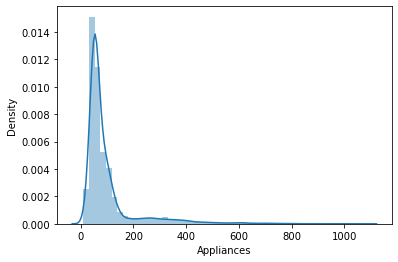

In [9]:
sns.distplot(dataset['Appliances'])

<AxesSubplot:>

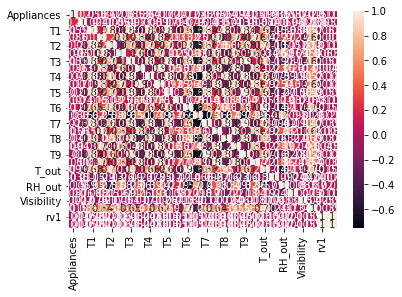

In [10]:
sns.heatmap(dataset.corr(), annot=True)

In [11]:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

In [12]:
#dataset.drop(['date','lights'] axis = 1, inplace = True)

In [13]:
dataset.drop('date',axis=1,inplace=True)

In [14]:
#dataset.drop('lights',axis=1,inplace=True)

In [15]:
scaler = MinMaxScaler()
print(scaler.fit(dataset))

MinMaxScaler()


In [16]:
normalised_dataset = pd.DataFrame(scaler.fit_transform(dataset),columns=dataset.columns)

In [17]:
features_dataset = normalised_dataset.drop(columns=['lights'])

In [18]:
Appliances_target = normalised_dataset['Appliances']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(features_dataset, Appliances_target, test_size=0.30, random_state=42)

In [20]:
X_train

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
9129,0.037383,0.497360,0.236767,0.122850,0.565939,0.373878,0.303474,0.476577,0.264760,0.408027,...,0.475893,0.376380,0.168810,0.862791,0.776316,0.142857,0.984615,0.192308,0.724554,0.724554
2453,0.018692,0.286167,0.482616,0.188999,0.669978,0.217957,0.735317,0.270270,0.691421,0.178691,...,0.240375,0.703504,0.262594,0.836434,0.807018,0.142857,0.600000,0.342383,0.864041,0.864041
9152,0.028037,0.422386,0.230529,0.057427,0.606430,0.373878,0.338059,0.414414,0.236449,0.378404,...,0.468262,0.409803,0.110397,0.853488,0.859649,0.095238,0.917949,0.158371,0.499502,0.499502
12694,0.102804,0.560718,0.446840,0.280834,0.704002,0.514290,0.515189,0.540541,0.486556,0.509317,...,0.561915,0.340784,0.444802,0.559690,0.750000,0.119048,0.384615,0.558069,0.323173,0.323173
16952,0.037383,0.835269,0.422071,1.000000,0.318493,0.745383,0.459106,0.900901,0.516432,0.748845,...,0.854318,0.633278,0.849946,0.530233,0.355263,0.142857,0.600000,0.787330,0.341060,0.341060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.046729,0.524815,0.381892,0.239157,0.636236,0.481888,0.478268,0.576577,0.517712,0.455805,...,0.568852,0.471578,0.468382,0.492248,0.706140,0.476190,0.600000,0.562594,0.910318,0.910318
11964,0.102804,0.591341,0.458949,0.428883,0.607461,0.456962,0.582489,0.557658,0.702518,0.417582,...,0.561915,0.625966,0.717042,0.469767,0.552632,0.142857,0.600000,0.791855,0.698711,0.698711
5390,0.018692,0.369588,0.238785,0.152653,0.481582,0.240944,0.412370,0.279279,0.325651,0.302914,...,0.312175,0.426325,0.126474,0.595349,0.828947,0.261905,0.948718,0.165913,0.381388,0.381388
860,0.065421,0.527983,0.234933,0.315047,0.412016,0.332336,0.380122,0.540541,0.341585,0.259914,...,0.375650,0.509106,0.227224,0.831008,0.530702,0.095238,0.600000,0.114630,0.020909,0.020909


In [21]:
X_test

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
8980,0.028037,0.432946,0.230529,0.120669,0.525822,0.256730,0.380122,0.419820,0.279129,0.312470,...,0.457856,0.408251,0.217578,0.920930,0.846491,0.166667,0.953846,0.298643,0.512428,0.512428
2754,0.074766,0.538543,0.717641,0.377272,0.700066,0.368339,0.956224,0.489489,0.567933,0.224346,...,0.145682,0.622241,0.247588,0.588372,0.868421,0.214286,0.400000,0.352941,0.469466,0.469466
9132,0.037383,0.485744,0.233281,0.111461,0.564252,0.371109,0.300670,0.467568,0.260350,0.408027,...,0.468262,0.377621,0.167203,0.858140,0.776316,0.142857,0.984615,0.190045,0.002761,0.002761
14359,0.037383,0.485744,0.385561,0.566271,0.404255,0.401573,0.381679,0.656757,0.323346,0.411212,...,0.561915,0.388797,0.445338,0.895349,0.616228,0.369048,0.600000,0.466817,0.205799,0.205799
8875,0.056075,0.335093,0.223007,0.026411,0.552910,0.232635,0.356753,0.374775,0.311851,0.244625,...,0.427680,0.477373,0.145766,0.938372,0.912281,0.285714,0.735897,0.233032,0.215015,0.215015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,0.224299,0.560718,0.300248,0.370487,0.412504,0.386895,0.576414,0.608709,0.488263,0.264692,...,0.312175,0.507726,0.220257,0.841860,0.756579,0.107143,0.430769,0.251131,0.910115,0.910115
10993,0.046729,0.518479,0.310063,0.225345,0.593214,0.481888,0.446799,0.464865,0.495092,0.446249,...,0.561915,0.528422,0.439443,0.422093,0.651316,0.583333,0.600000,0.486425,0.975531,0.975531
11761,0.037383,0.436818,0.340611,0.188999,0.633705,0.381356,0.403490,0.422523,0.453692,0.378404,...,0.490114,0.356926,0.392283,0.665504,0.796053,0.083333,0.969231,0.515083,0.792703,0.792703
12364,0.093458,0.550158,0.390973,0.334383,0.602774,0.481888,0.468453,0.576577,0.554702,0.503583,...,0.620881,0.417770,0.494105,0.545736,0.596491,0.642857,0.600000,0.520362,0.608307,0.608307


In [22]:
y_train

9129     0.037383
2453     0.018692
9152     0.028037
12694    0.102804
16952    0.037383
           ...   
11284    0.046729
11964    0.102804
5390     0.018692
860      0.065421
15795    0.112150
Name: Appliances, Length: 13814, dtype: float64

In [23]:
y_test

8980     0.028037
2754     0.074766
9132     0.037383
14359    0.037383
8875     0.056075
           ...   
831      0.224299
10993    0.046729
11761    0.037383
12364    0.093458
11863    0.037383
Name: Appliances, Length: 5921, dtype: float64

In [24]:
lm = LinearRegression()

In [25]:
lm.fit(X_train,y_train)

LinearRegression()

In [26]:
# print the intercept
print(lm.intercept_)

-1.8041124150158794e-16


In [27]:
predictions = lm.predict(X_test)

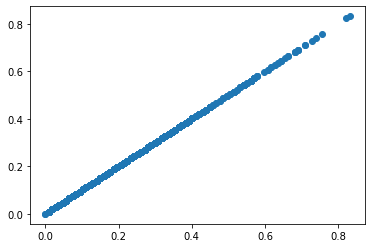

In [28]:
plt.scatter(y_test,predictions)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


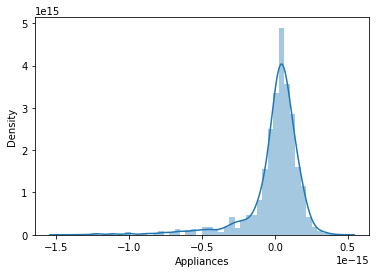

In [29]:
sns.distplot((y_test-predictions),bins=50);

In [30]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R-Squared:', metrics.r2_score(y_test, predictions))


MAE: 1.1899432495791528e-16
MSE: 3.7098067792407815e-32
RMSE: 1.9260858701627976e-16
R-Squared: 1.0


In [34]:
rss = np.sum(np.square(y_test - predictions))
round(rss, 3 )

0.0